In [2]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
%pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight

Note: you may need to restart the kernel to use updated packages.


In [7]:
#             Uploading Dataset


df = pd.read_csv("C://Users//ismet//OneDrive//Masaüstü//diabet//Dataset of Diabetes .csv")

df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [8]:
#       Data Pre-Processing   1


df = df.drop('ID', axis = 1)

df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

df['CLASS'] = df['CLASS'].map({'P': 0, 'Y': 1, 'N': 2})

df.fillna(df.median(), inplace=True)

df.head()

,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,17975,0.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,2.0
1,34221,1.0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,2.0
2,47975,0.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,2.0
3,87656,0.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,2.0
4,34223,1.0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,2.0


In [10]:
#       Data Pre-Processing   2


x = df.drop('CLASS', axis=1)
y = df['CLASS']


scaler = StandardScaler()
x = scaler.fit_transform(x)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(x_train, y_train)


importances = model_rf.feature_importances_


x_train_df = pd.DataFrame(x_train, columns=df.drop('CLASS', axis=1).columns)


sorted_indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(x_train_df.shape[1]):
    print(f"{f + 1}. feature {x_train_df.columns[sorted_indices[f]]} - importance: {importances[sorted_indices[f]]}")


x_train = np.delete(x_train, [7,10,9,4,8,3,1], axis=1)
x_test = np.delete(x_test, [7,10,9,4,8,3,1], axis=1)


y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

Feature ranking:
1. feature HbA1c - importance: 0.3448758874953945
2. feature BMI - importance: 0.23523189866178149
3. feature AGE - importance: 0.12407838517640722
4. feature Chol - importance: 0.06626205238526324
5. feature TG - importance: 0.05104353255952309
6. feature No_Pation - importance: 0.0447170126330766
7. feature VLDL - importance: 0.03988318068293403
8. feature LDL - importance: 0.0291485821694756
9. feature Cr - importance: 0.020720230643198407
10. feature HDL - importance: 0.02040260372395037
11. feature Urea - importance: 0.017032944665291656
12. feature Gender - importance: 0.006603689203703722


In [11]:
# Creating Model
model = Sequential()

# Input Layer
model.add(Dense(units=128, activation='relu', input_dim=x_train.shape[1]))

# First Hidden Layer
model.add(Dense(units=32, activation='relu'))

# Second Hidden Layer
model.add(Dense(units=64, activation='relu'))

# Output Layer
model.add(Dense(units=3, activation='softmax'))

# Compiling Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of Model 
model.summary()

c:\Users\ismet\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,203 (28.14 KB)

 Trainable params: 7,203 (28.14 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Adding Early Stopping, Creating A Balance Between Classes And Training Model 


class_weights = compute_class_weight('balanced', classes=np.array([0, 1, 2]), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    x_train, y_train_one_hot,
    epochs=1000, batch_size=32,
    validation_data=(x_test, y_test_one_hot),
    callbacks=[early_stopping],
    class_weight=class_weights_dict
)

Epoch 1/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7891 - loss: 0.9860 - val_accuracy: 0.8650 - val_loss: 0.6558
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8335 - loss: 0.8544 - val_accuracy: 0.8600 - val_loss: 0.4107
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8526 - loss: 0.6549 - val_accuracy: 0.8700 - val_loss: 0.3798
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8758 - loss: 0.5511 - val_accuracy: 0.8650 - val_loss: 0.3668
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8581 - loss: 0.5544 - val_accuracy: 0.8750 - val_loss: 0.3384
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8835 - loss: 0.4964 - val_accuracy: 0.8950 - val_loss: 0.3204
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8961 - loss: 0.4467 - val_accuracy: 0.8850 - val_loss: 0.3175
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9293 - loss: 0.3611 - val_accuracy: 0.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9655 - loss: 0.0633
Test Loss: 0.06810420006513596, Test Accuracy: 0.9599999785423279
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


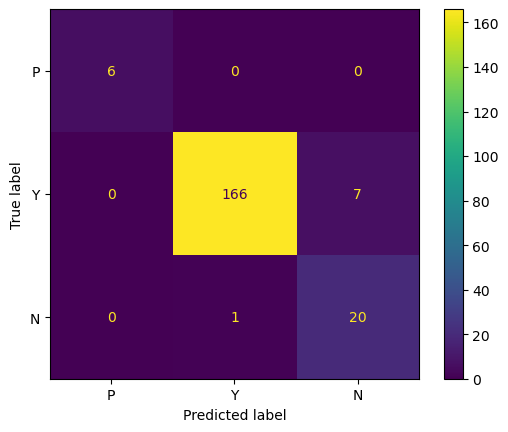

In [13]:
# And Results


test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')

y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)

y_test_classes = np.argmax(y_test_one_hot, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['P', 'Y', 'N'])
disp.plot(cmap='viridis')